#Introduction to pandas - CAM psychophysics


8/25/15 - Summer workshop on the dynamic brain <br>
shawno@alleninstitute.org

##Pandas:
* Library with high-level data structures and manipulation tools:
    * Load/save data
    * Interactively explore data sets
    * Select, filter tabular data
    * Compute summary statistics
    * Plotting and visualization
    * Groupby

##DataFrame object:

* Represents tabular, spreadsheet-like data structure
* Ordered collection of columns
* Each column can be a different value type (numeric, string, boolean, etc.)


##Imports

In [1]:
# Convention for import naming
import pandas as pd

In [2]:
# Format DataFrame display properties
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)
pd.set_option('display.notebook_repr_html',True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Loading data
There are a large number of methods for reading various data formats

In [6]:
read_methods = [x for x in dir(pd) if 'read' in x]
read_methods

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_pickle',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

##Load DataFrame from .pkl file

In [7]:
file_name = r'cam_psychophysics.pkl'
df = pd.read_pickle(file_name)

###Use head() and tail() methods to take quick look at data structure

In [8]:
df.head()

,trial,contrast,ori,sf,trial_start_time,reaction_time,behavioral_choice,cell_1,cell_2,cell_3
0,1,0.154016,0,0.08,0.0000,NaN,False,2.963491,0.527927,48.264495
1,2,0.000000,0,0.08,10.5132,NaN,False,0.694963,14.859777,-1.813913
2,3,0.110599,0,0.08,21.6051,0.5007,True,39.441033,33.849090,4.552901
3,4,1.000000,0,0.08,44.0905,0.6683,True,161.265780,65.791733,24.354897
4,5,0.065776,0,0.08,57.8520,NaN,False,2.211847,-4.142675,3.766877


In [9]:
df.tail()

,trial,contrast,ori,sf,trial_start_time,reaction_time,behavioral_choice,cell_1,cell_2,cell_3
273,274,0.154016,0,0.08,2704.8105,0.5664,True,1.161886,1.296190,-0.889249
274,275,0.110599,0,0.08,2715.8854,0.4669,True,0.761951,-0.110314,-0.021039
275,276,0.000000,0,0.08,2721.9734,NaN,False,-0.775457,-0.811356,-0.419071
276,277,1.000000,0,0.08,2729.8308,0.5499,True,19.334407,15.026411,3.668632
277,278,0.154016,0,0.08,2737.1862,0.4337,True,NaN,NaN,NaN


###Many familiar functions/methods work with DataFrames (e.g. len(), .keys(), .shape()...)

In [10]:
len(df)

278

In [11]:
print '# of trials = %s' %len(df)

# of trials = 278


In [12]:
df.shape

(278, 10)

In [13]:
keys = df.keys()
print keys

Index([u'trial', u'contrast', u'ori', u'sf', u'trial_start_time',
       u'reaction_time', u'behavioral_choice', u'cell_1', u'cell_2',
       u'cell_3'],
      dtype='object')


In [14]:
columns = df.columns
print columns

Index([u'trial', u'contrast', u'ori', u'sf', u'trial_start_time',
       u'reaction_time', u'behavioral_choice', u'cell_1', u'cell_2',
       u'cell_3'],
      dtype='object')


In [15]:
columns is keys

True

##Selecting columns

###Retrieve column based on column name

In [16]:
# Return Series
contrast = df['contrast']
contrast.head(10)

0    0.154016
1    0.000000
2    0.110599
3    1.000000
4    0.065776
5    0.154016
6    0.000000
7    0.065776
8    1.000000
9    1.000000
Name: contrast, dtype: float64

In [17]:
# Return numpy ndarray
contrast_array = df['contrast'].values
contrast_array[:10]

array([ 0.15401601,  0.        ,  0.11059908,  1.        ,  0.06577578,
        0.15401601,  0.        ,  0.06577578,  1.        ,  1.        ])

###Inspect data by making a plot

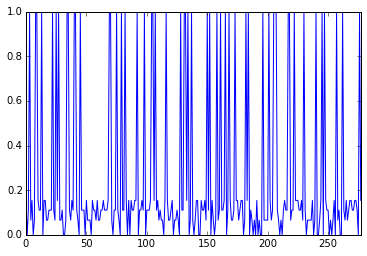

In [18]:
df.contrast.plot()

(-0.4, 1.4)

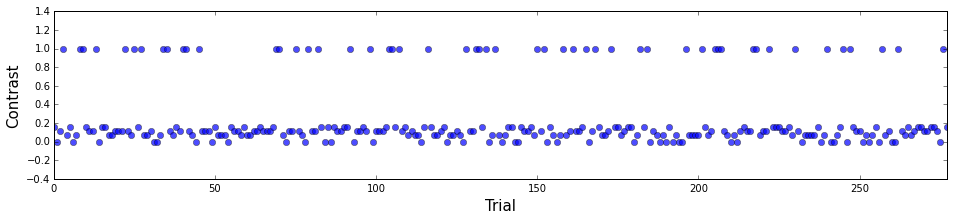

In [20]:
df.contrast.plot(x='trial',marker='o',alpha=0.7,linestyle='none')

# Format plot
plt.gcf().set_size_inches(16,3)
plt.ylabel('Contrast',fontsize=15)
plt.xlabel('Trial',fontsize=15)
plt.ylim(-0.4,1.4)

###Select multiple columns

In [21]:
df_tmp = df[['ori','sf']]

In [22]:
# Use copy to get new DataFrame object instead of a 'view' on existing object
df_tmp = df[['ori','sf']].copy()

In [23]:
df_tmp.head(10)

,ori,sf
0,0,0.08
1,0,0.08
2,0,0.08
3,0,0.08
4,0,0.08
5,0,0.08
6,0,0.08
7,0,0.08
8,0,0.08
9,0,0.08


In [24]:
print df_tmp.ori.unique()
print df_tmp.sf.unique()

[0]
[ 0.08]


##Adding, deleting columns

###Delete column

In [25]:
df.drop(['ori','sf'],axis=1,inplace=True)
df.head(3)

,trial,contrast,trial_start_time,reaction_time,behavioral_choice,cell_1,cell_2,cell_3
0,1,0.154016,0.0000,NaN,False,2.963491,0.527927,48.264495
1,2,0.000000,10.5132,NaN,False,0.694963,14.859777,-1.813913
2,3,0.110599,21.6051,0.5007,True,39.441033,33.849090,4.552901


###Add new column

In [26]:
df.head(2)

,trial,contrast,trial_start_time,reaction_time,behavioral_choice,cell_1,cell_2,cell_3
0,1,0.154016,0.0000,NaN,False,2.963491,0.527927,48.264495
1,2,0.000000,10.5132,NaN,False,0.694963,14.859777,-1.813913


In [27]:
new_column = df.contrast == 0
new_column.head()

0    False
1     True
2    False
3    False
4    False
Name: contrast, dtype: bool

In [28]:
# Add new column
df['blank_trial'] = new_column

In [29]:
df.head(2)

,trial,contrast,trial_start_time,reaction_time,behavioral_choice,cell_1,cell_2,cell_3,blank_trial
0,1,0.154016,0.0000,NaN,False,2.963491,0.527927,48.264495,False
1,2,0.000000,10.5132,NaN,False,0.694963,14.859777,-1.813913,True


##Selecting rows and filtering

###Slice rows

In [30]:
df[50:100:10] # [start, end, step]

,trial,contrast,trial_start_time,reaction_time,behavioral_choice,cell_1,cell_2,cell_3,blank_trial
50,51,0.154016,683.6033,0.5167,True,25.331746,6.095053,2.348168,False
60,61,0.065776,805.8876,0.6341,True,0.146912,0.939254,1.098063,False
70,71,1.000000,908.8725,0.6845,True,70.375252,23.015545,5.261710,False
80,81,0.110599,1007.6379,0.3002,True,1.065761,0.426136,0.819726,False
90,91,0.154016,1115.6605,0.2507,True,22.269671,7.499783,2.342139,False


###Selection purely by position (integer index)

In [35]:
df.iloc[150:200:10,0:10:2]

,trial,trial_start_time,behavioral_choice,cell_2,blank_trial
150,151,1654.0906,True,16.188409,False
160,161,1755.1730,True,0.490875,False
170,171,1830.2355,True,-0.982403,False
180,181,1933.3039,False,-0.854056,True
190,191,2013.6208,False,-0.023270,True


###Select rows based on boolean array

In [36]:
df.columns

Index([u'trial', u'contrast', u'trial_start_time', u'reaction_time',
       u'behavioral_choice', u'cell_1', u'cell_2', u'cell_3', u'blank_trial'],
      dtype='object')

In [37]:
blank_bool = df.blank_trial.values
blank_bool[:50]

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True], dtype=bool)

In [38]:
print "# of rows in original df = %s" % len(df)
print "# of rows after boolean indexing = %s" % len(df[blank_bool])

# of rows in original df = 278
# of rows after boolean indexing = 44


###Filter dataframe by inserting expression in brackets that yields boolean array

In [41]:
df_blank = df[df.contrast==0]
df_blank.head(5)

,trial,contrast,trial_start_time,reaction_time,behavioral_choice,cell_1,cell_2,cell_3,blank_trial
1,2,0,10.5132,NaN,False,0.694963,14.859777,-1.813913,True
6,7,0,79.6365,NaN,False,0.177490,-1.843292,-0.129403,True
14,15,0,168.7602,NaN,False,-2.021175,-1.392319,-1.559392,True
31,32,0,360.1184,NaN,False,-0.673639,-0.589315,-1.106445,True
32,33,0,369.7267,NaN,False,-0.164662,0.081860,-1.228453,True


In [42]:
len(df_blank)

44

## Summary statistics

####value_counts()

In [43]:
df.contrast.value_counts().sort_index()

0.000000    44
0.065776    60
0.110599    68
0.154016    54
1.000000    52
dtype: int64

####mean()

In [44]:
df.behavioral_choice.mean()

0.68705035971223016

In [45]:
contrasts = sorted(df.contrast.unique())
for c in contrasts:
    print "contrast = ", c
    print "hit_rate = ", df[df.contrast==c].behavioral_choice.mean()
    print ""

contrast =  0.0
hit_rate =  0.0681818181818

contrast =  0.0657757813818
hit_rate =  0.4

contrast =  0.110599079137
hit_rate =  0.897058823529

contrast =  0.154016008969
hit_rate =  0.962962962963

contrast =  1.0
hit_rate =  0.980769230769



####describe()

In [46]:
df.reaction_time.describe()

count    190.000000
mean       0.467658
std        0.123261
min        0.117000
25%        0.385300
50%        0.458950
75%        0.533900
max        0.786700
Name: reaction_time, dtype: float64

##Plotting

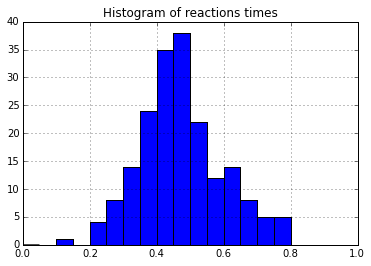

In [47]:
df.reaction_time.hist(range=(0,1),bins=20)
plt.title('Histogram of reactions times')

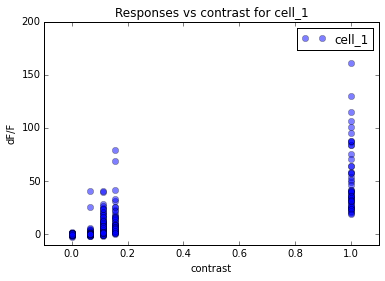

In [50]:
fig,ax = plt.subplots(1,1)
ax.set_title('Responses vs contrast for cell_1')
ax.set_ylabel('dF/F')
ax.set_ylim(-10,200)

df.plot(x='contrast',y='cell_1',marker='o',linestyle='none',alpha=0.5,ax=ax,xlim=(-0.1,1.1))

(-20, 150)

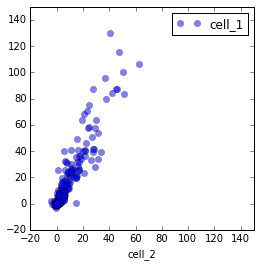

In [51]:
fig,ax = plt.subplots(1,1)

df.plot(x='cell_2',y='cell_1',marker='o',linestyle='none',ax=ax,alpha=0.5)

ax.set_aspect(1)
ax.set_xlim(-20,150)
ax.set_ylim(-20,150)

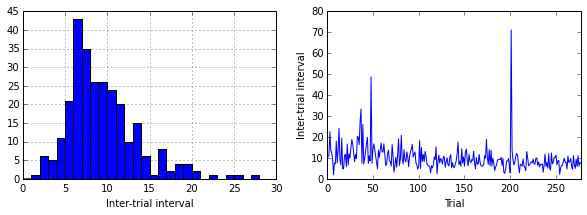

In [52]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,3)

df.trial_start_time.diff().hist(ax=ax[0],range=(0,30),bins=30)

ax[0].set_xlabel('Inter-trial interval')
df.trial_start_time.diff().plot(ax=ax[1])
ax[1].set_xlabel('Trial')
ax[1].set_ylabel('Inter-trial interval')

##Groupby and "Split, apply, and combine"

In [53]:
gb = df.groupby('contrast')

In [55]:
gb.behavioral_choice.mean()

contrast
0.000000    0.068182
0.065776    0.400000
0.110599    0.897059
0.154016    0.962963
1.000000    0.980769
Name: behavioral_choice, dtype: float64

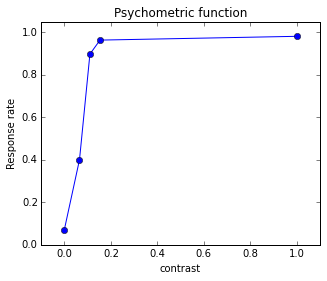

In [56]:
fig,ax = plt.subplots(1,1)
gb.behavioral_choice.mean().plot(marker='o')

# format plot
fig.set_size_inches(5,4)
ax.set_title('Psychometric function')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(0,1.05)
ax.set_ylabel('Response rate')

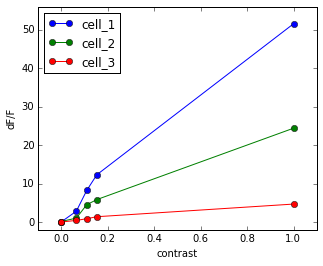

In [57]:
fig,ax = plt.subplots(1,1)
df[df.behavioral_choice==True].groupby('contrast')['cell_1','cell_2','cell_3'].mean().plot(marker='o',ax=ax)

# format plot
fig.set_size_inches(5,4)
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-2,56)
ax.set_ylabel('dF/F')

In [58]:
print "Responses at threshold contrast level:"
print df[df.contrast==contrasts[1]].groupby('behavioral_choice')['cell_1','cell_2','cell_3'].mean()

Responses at threshold contrast level:
                     cell_1    cell_2    cell_3
behavioral_choice                              
False              0.790146 -0.037260  0.032959
True               2.822779  1.035414  0.438028


(-1, 2)

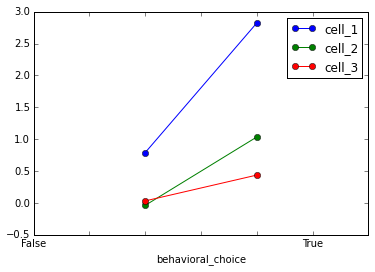

In [59]:
df[df.contrast==contrasts[1]].groupby('behavioral_choice')['cell_1','cell_2','cell_3'].mean().plot(marker='o')
plt.xlim(-1,2)

###Save: to_pickle(), to_excel(), etc.

In [60]:
save_name = r'data.pkl'
df.to_pickle(save_name)

save_name = r'data.xlsx'
df.to_excel(save_name)

###Homework: Make dataframe of metadata for CAM experiments